In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import skimage
from skimage import io; io.use_plugin('matplotlib')
from skimage.util import random_noise
from skimage.filters import median
from skimage import exposure
from typing import List
import cv2
plt.rcParams["figure.figsize"] = (20,10)

In [ ]:
def plot_figure(image_list: List[np.ndarray], title_list: List[str], height: int, width: int, cmap: str='gray'):
    assert len(image_list) == len(title_list)
    assert height > 0
    assert width > 0
    for i in range(len(image_list)):
        
        if cmap == 'gray':
            plt.subplot(height, width, i + 1), plt.imshow(image_list[i], cmap=cmap)
        elif cmap == 'rgb':
            plt.subplot(height, width, i + 1), plt.imshow(image_list[i])
        elif cmap == 'bgr':
            plt.subplot(height, width, i + 1), plt.imshow(cv2.cvtColor(image_list[i], cv2.COLOR_BGR2RGB))
        else:
            plt.subplot(height, width, i + 1), plt.imshow(image_list[i], cmap=cmap)
            
        plt.title(title_list[i])
        plt.xticks([]), plt.yticks([])
    plt.show()

## Random Noise
Gaussian Noise is additive, independent at each pixel, and independent of the signal intensity.

For paractice we will work using `random_noise` from scikit-image library. Check the documentation at https://scikit-image.org/docs/dev/api/skimage.util.html#random-noise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


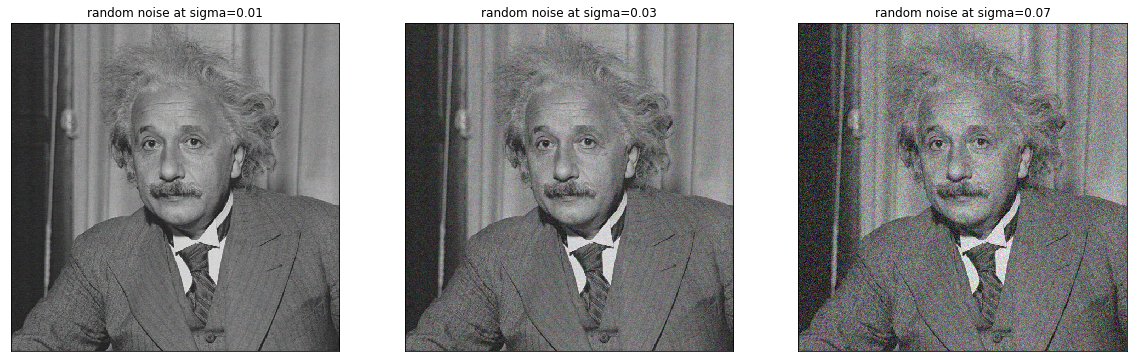

In [ ]:
# Random noise from skimage
img = skimage.io.imread(fname="./assets/original.png")
img = skimage.img_as_float(img)
n1 = random_noise(img, mode='gaussian', clip=False, var=0.01**2)
n2 = random_noise(img, mode='gaussian', clip=False, var=0.03**2)
n3 = random_noise(img, mode='gaussian', clip=False, var=0.07**2)

plot_figure([n1,n2,n3 ], ['random noise at sigma=0.01', 'random noise at sigma=0.03', 'random noise at sigma=0.07'], 1, 3, 'gray')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


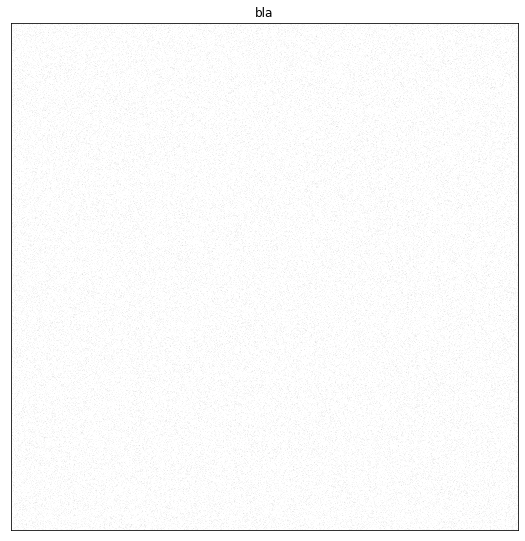

In [ ]:
plot_figure([n2-n1],['bla'],1,2)

**What do you expect if you subtracted n2 and n1?**
- another random noise
-------------------------------------------------
**What is the mean and variance of the error?**
- the mean will be the difference of the two means. As they both zeros, the mean = 0.
- the variance will be the summation of the variance of the two distributions. Then the variance = 0.01** 2 + 0.03**2






**What will happen if we averaged noisy images with each others?**


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


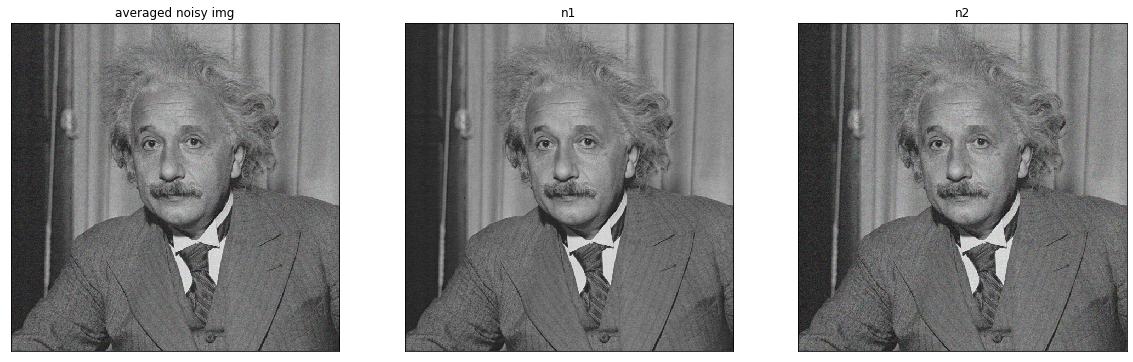

In [ ]:
average_img = (n1+n2+n3)/3 #average the three noisy images together
plot_figure([average_img,n1,n2],['averaged noisy img','n1','n2'],1,3,'gray')

If we averages noisy images with random noises, we will reduce the intensty of the noise in each pixel.



**Negative transformation**



In [ ]:
def apply_negative_transform(img: np.array):
    negative_img = 255 - img
    return negative_img

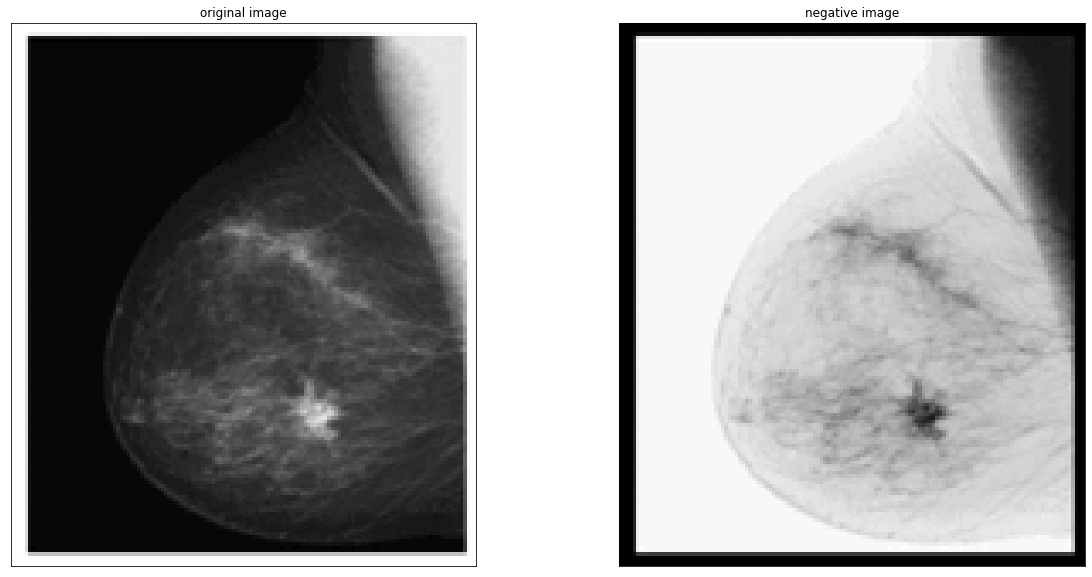

In [ ]:
img = cv2.imread('./assets/negative.png', cv2.IMREAD_GRAYSCALE)
negative_img = apply_negative_transform(img)
plot_figure([img,negative_img],['original image','negative image'],1,2,'gray')



**linear transformation**


In [ ]:
def apply_linear_transform(img: np.array):
    minimum = np.min(img) #max value in the image
    maximum = np.max(img) #min value in the image
    img_range = maximum-minimum #values range
    new = (img - minimum)/img_range #transform the image so it is spread between [0,1] or [0,255] depending on the type
    return new

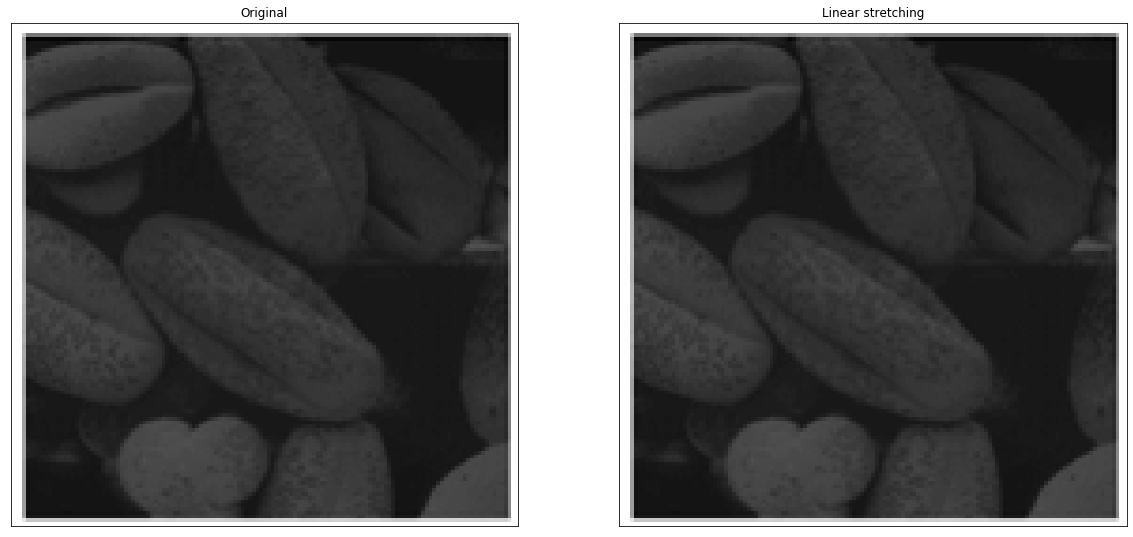

In [ ]:
img = cv2.imread('./assets/dark.png',cv2.IMREAD_GRAYSCALE)
new = apply_linear_transform(img)
plot_figure([img,new],['Original','Linear stretching'],1,2,'gray')

**Gamma correction**


In [ ]:
def apply_gamma_correction(img:np.array,gamma,c):
    #apply gamma correction equation
    new = c*(img**gamma)
    return new

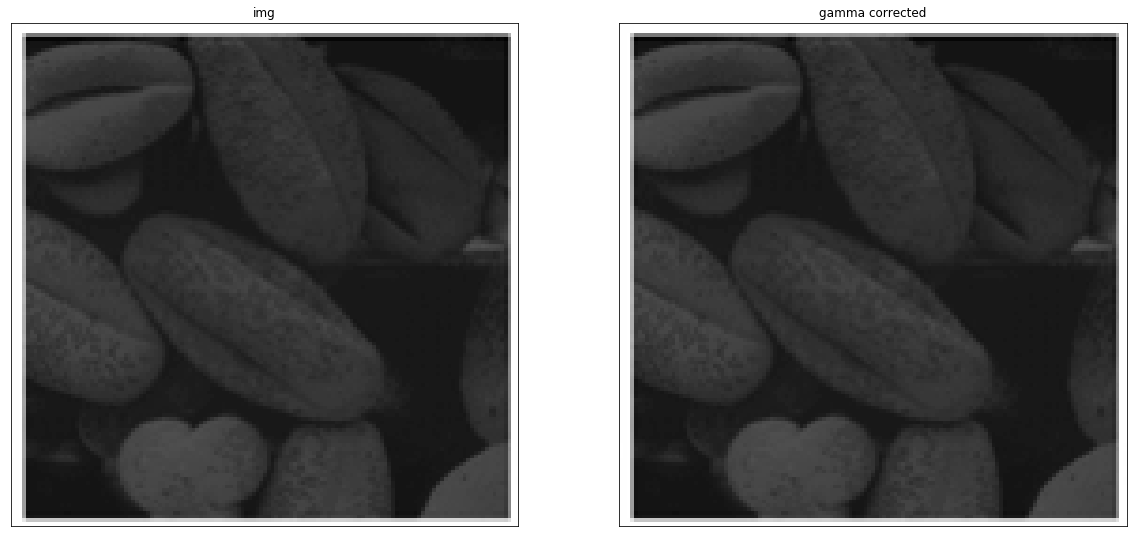

In [ ]:
img = cv2.imread('./assets/dark.png',cv2.IMREAD_GRAYSCALE)
img = skimage.img_as_float(img)
new = apply_gamma_correction(img,1,0.05)
plot_figure([img,new],['img','gamma corrected'],1,2,'gray')

In [ ]:
img = skimage.io.imread(fname="./assets/bad_kid.tif")
hist, bins = np.histogram(img.reshape(-1), bins=256)

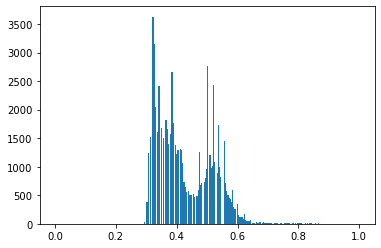

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.hist((img/255).ravel(),256,[0,1])
plt.show()

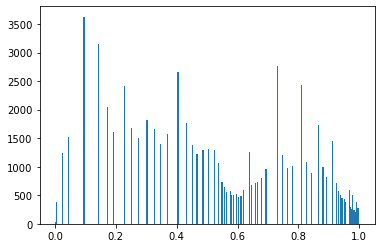

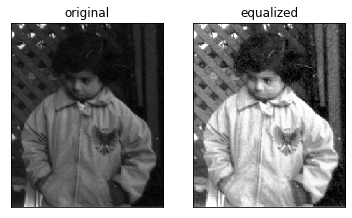

float64


In [ ]:
#new_img = cv2.equalizeHist(img)
new_img= exposure.equalize_hist(img)
plt.hist(new_img.ravel(),256,[0,1])
plt.show()
plot_figure([img, new_img], ['original', 'equalized'],1, 2, 'gray')
print(new_img.dtype)